In [332]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
from statistics import mode
from math import sqrt
from random import choice

In [376]:
selections = [(),
 ('Phenolic Impregnated Carbon Ablator (PICA)',
  'Silicone Ablative TPS',
  'Titania Photonic Crystal Heat Shield',
  'Barium Titanate Heat Shield',
  'Cryogenic Fluid Tank',
  'Flurocarbon Fluid Tank',
  'Aluminum-Coated Mylar Insulation',
  'Kapton Space Blanket',
  'Silicon Oxycarbide Shield Tile'),
 ('Reinforced Carbon-Carbon (RCC) Shield Tile',
  'Polymeric Nanofiber Composite Matrix',
  'Electrospun Nanofiber Mat',
  'Graphene Aerogel Thermal Insulation',
  'Carbon Nanotube Reinforced Polymer Shield',
  'Titanium Foil Radiator',
  'Zirconium Dioxide Ceramic Heat Sink',
  'Polyimide Foam Thermal Barrier',
  'Tungsten Mesh Radiation Shield'),
 ('Nickel-Chromium Alloy Heat Exchanger',
  'Boron Nitride Nanotube Composite',
  'Ceramic Fiber Radiant Heat Shield',
  'Stainless Steel Honeycomb Structure',
  'Plasma-Sprayed Ceramic Coating',
  'Graphene-Coated Carbon Fiber Sheet',
  'Aerogel-Infused Carbon Fiber Panel',
  'Titanium Alloy Thermal Conductive Plate',
  'Polybenzimidazole (PBI) Insulation Layer'),
 (),
 ('Copper Heat Pipe Array',
  'Nanocrystalline Diamond Thermal Spreader',
  'Polyethylene Terephthalate (PET) Film Barrier',
  'Zirconium Carbide Thermal Barrier Coating',
  'Aluminum Nitride Ceramic Heat Dissipator',
  'Polyurethane Foam Thermal Insulator',
  'Nickel-Titanium Shape Memory Alloy Radiator',
  'Silica Aerogel Nanocomposite Layer',
  'Carbon Foam Radiative Cooler'),
 ('Fiberglass-Reinforced Epoxy Resin Thermal Barrier',
  'Ceramic Matrix Composite Radiant Heat Shield',
  'Titanium Diboride Reinforced Carbon Foam',
  'Boron Carbide-Coated Aluminum Heat Sink',
  'Polyimide Film Thermal Insulation Layer',
  'Copper-Nickel Alloy Heat Transfer Plate',
  'Diamond-Like Carbon (DLC) Coated Radiator',
  'Graphene Oxide Nanocomposite Thermal Barrier',
  'Polyether Ether Ketone (PEEK) Insulating Panel'),
 ('Alumina-Silica Composite Heat Resistant Tile',
  'Tantalum-Tungsten Alloy Radiant Heat Exchanger',
  'Carbon Nanofiber-Reinforced Silicone Thermal Blanket',
  'Graphene Nanoplatelet Thermal Interface Material',
  'Titanium Nitride-Coated Carbon Fiber Heat Shield',
  'Polyimide Foam Insulation Pad',
  'Beryllium Oxide Ceramic Radiative Cooler',
  'Silver-Plated Copper Heat Spreader',
  'Polyethylene Naphthalate (PEN) Thermal Barrier Film')]

In [381]:
df = pd.read_csv("glass.csv").drop(columns=['RI', 'Fe', 'Si', 'Ba'])
df.columns = [0, 1, 2, 3, 4, "Type"]
df['distance'] = float("inf")


def replace_with_random(row):
    type_value = row['Type']
    if type_value in range(1, len(selections)):
        return choice(selections[int(type_value)])
    else:
        return None

df['Type'] = df.apply(replace_with_random, axis=1)

df

,0,1,2,3,4,Type,distance
0,13.64,4.49,1.10,0.06,8.75,Flurocarbon Fluid Tank,inf
1,13.89,3.60,1.36,0.48,7.83,Flurocarbon Fluid Tank,inf
2,13.53,3.55,1.54,0.39,7.78,Cryogenic Fluid Tank,inf
3,13.21,3.69,1.29,0.57,8.22,Titania Photonic Crystal Heat Shield,inf
4,13.27,3.62,1.24,0.55,8.07,Flurocarbon Fluid Tank,inf
...,...,...,...,...,...,...,...
209,14.14,0.00,2.88,0.08,9.18,Alumina-Silica Composite Heat Resistant Tile,inf
210,14.92,0.00,1.99,0.00,8.40,Polyimide Foam Insulation Pad,inf
211,14.36,0.00,2.02,0.00,8.44,Carbon Nanofiber-Reinforced Silicone Thermal B...,inf
212,14.38,0.00,1.94,0.00,8.48,Alumina-Silica Composite Heat Resistant Tile,inf


In [364]:
target = pd.Series([13.4, 4.1, 1.75, 0.74, 7.3, "X"])
target_df = pd.DataFrame({c: [t] for c, t in zip(df.columns, target)})
target_df

,0,1,2,3,4,Type
0,13.4,4.1,1.75,0.74,7.3,X


In [339]:
df_numeric = df.drop(columns=['distance'])
df_with_target = pd.concat([df_numeric, target_df], ignore_index=True)
plt.figure(figsize=(10, 6))
line_widths = {
    1: ('r', 1), 
    2: ('orange', 1), 
    3: ('y', 1), 
    5: ('g', 1),
    6: ('b', 1), 
    7: ('pink', 1),
    "X": ('k', 2), 
}

# for i, style in line_widths.items():
#     color, lw = style
#     df_class = df_with_target[df_with_target["Type"] == i]
#     pd.plotting.parallel_coordinates(df_class, class_column="Type", color=color, linewidth=lw, ax=plt.gca())

# #pd.plotting.parallel_coordinates(df_with_target, class_column="Type", color=('r','orange','y','g','b','pink','k'), linewidth=lw)
# plt.title('Parallel Coordinates Plot')
# plt.xlabel('Features')
# plt.ylabel('Values')
# plt.show()

<Figure size 1000x600 with 0 Axes>

In [382]:
df['distance'] = (sum((df.loc[:,i]-target[i])**2 for i in range(5))) ** 0.5

k = 11
df = df.sort_values('distance', ascending=True)
knn = list(df.head(k).Type)
print(*sorted(knn), sep="\n")
print("\n", mode(knn))

Carbon Nanotube Reinforced Polymer Shield
Carbon Nanotube Reinforced Polymer Shield
Cryogenic Fluid Tank
Electrospun Nanofiber Mat
Graphene Aerogel Thermal Insulation
Graphene Aerogel Thermal Insulation
Graphene Aerogel Thermal Insulation
Graphene Aerogel Thermal Insulation
Polymeric Nanofiber Composite Matrix
Polymeric Nanofiber Composite Matrix
Reinforced Carbon-Carbon (RCC) Shield Tile

 Graphene Aerogel Thermal Insulation


Text(0.5, 1.0, 'Scatter Plot')

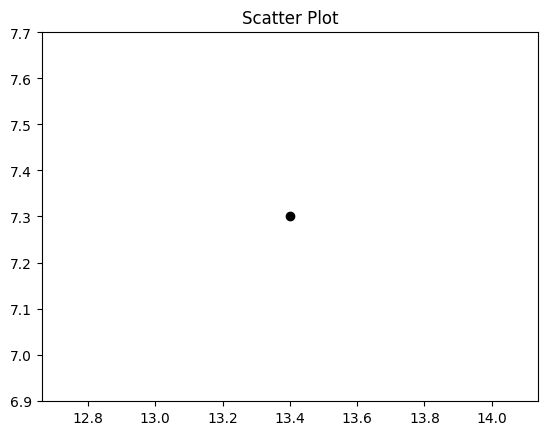

In [340]:
colors = dict(enumerate(["red", "orange", "yellow", "blue", "green", "violet", "pink"], 1))

a, b = 0, 4

plt.scatter(
    df[a], 
    df[b], 
    c=df['Type'].map(colors))
plt.scatter(target[a], target[b], c='black')
# plt.xlabel(cols[a])
# plt.ylabel(cols[b])
plt.title('Scatter Plot')

In [383]:
df_print = df.sort_values("Type", ascending=True)
df_print

,0,1,2,3,4,Type,distance
154,12.86,3.58,1.31,0.61,8.79,Aerogel-Infused Carbon Fiber Panel,1.729913
160,13.33,3.34,1.54,0.56,8.99,Aerogel-Infused Carbon Fiber Panel,1.874860
150,13.14,3.45,1.76,0.60,8.38,Aerogel-Infused Carbon Fiber Panel,1.294681
155,13.04,3.40,1.26,0.52,8.58,Aerogel-Infused Carbon Fiber Panel,1.595776
156,13.41,3.39,1.28,0.52,8.65,Aerogel-Infused Carbon Fiber Panel,1.611211
...,...,...,...,...,...,...,...
136,13.00,3.80,1.08,0.56,8.38,Zirconium Dioxide Ceramic Heat Sink,1.377570
79,12.82,3.52,1.90,0.69,7.97,Zirconium Dioxide Ceramic Heat Sink,1.070841
86,13.24,3.49,1.47,0.38,8.03,Zirconium Dioxide Ceramic Heat Sink,1.067052
138,12.79,3.52,1.54,0.66,7.90,Zirconium Dioxide Ceramic Heat Sink,1.057828


In [389]:
df_print.columns = ["Mass", "Density", "Thickness", "Radiation Output", "Area", "Type", "Distance"]

In [400]:
df_print = df_print[["Mass", "Density", "Thickness", "Area", "Radiation Output", "Type", "Distance"]]
df_print

,Mass,Density,Thickness,Area,Radiation Output,Type,Distance
154,12.86,3.58,1.31,8.79,0.61,Aerogel-Infused Carbon Fiber Panel,1.729913
160,13.33,3.34,1.54,8.99,0.56,Aerogel-Infused Carbon Fiber Panel,1.874860
150,13.14,3.45,1.76,8.38,0.60,Aerogel-Infused Carbon Fiber Panel,1.294681
155,13.04,3.40,1.26,8.58,0.52,Aerogel-Infused Carbon Fiber Panel,1.595776
156,13.41,3.39,1.28,8.65,0.52,Aerogel-Infused Carbon Fiber Panel,1.611211
...,...,...,...,...,...,...,...
136,13.00,3.80,1.08,8.38,0.56,Zirconium Dioxide Ceramic Heat Sink,1.377570
79,12.82,3.52,1.90,7.97,0.69,Zirconium Dioxide Ceramic Heat Sink,1.070841
86,13.24,3.49,1.47,8.03,0.38,Zirconium Dioxide Ceramic Heat Sink,1.067052
138,12.79,3.52,1.54,7.90,0.66,Zirconium Dioxide Ceramic Heat Sink,1.057828


In [401]:
df_print = df_print.drop(columns=["Distance"])
df_print

,Mass,Density,Thickness,Area,Radiation Output,Type
154,12.86,3.58,1.31,8.79,0.61,Aerogel-Infused Carbon Fiber Panel
160,13.33,3.34,1.54,8.99,0.56,Aerogel-Infused Carbon Fiber Panel
150,13.14,3.45,1.76,8.38,0.60,Aerogel-Infused Carbon Fiber Panel
155,13.04,3.40,1.26,8.58,0.52,Aerogel-Infused Carbon Fiber Panel
156,13.41,3.39,1.28,8.65,0.52,Aerogel-Infused Carbon Fiber Panel
...,...,...,...,...,...,...
136,13.00,3.80,1.08,8.38,0.56,Zirconium Dioxide Ceramic Heat Sink
79,12.82,3.52,1.90,7.97,0.69,Zirconium Dioxide Ceramic Heat Sink
86,13.24,3.49,1.47,8.03,0.38,Zirconium Dioxide Ceramic Heat Sink
138,12.79,3.52,1.54,7.90,0.66,Zirconium Dioxide Ceramic Heat Sink


In [402]:
df_print.to_csv('thermal_map_data.csv', index=False)

In [410]:
rad = pd.read_csv("radiation.csv") # .sort_values("Type")
# rad["Type"].replace({0: "Solar", 1: "Cosmic"}, inplace=True)
# rad.to_csv("radiation.csv", index=False)

rad.head()

,Frequency,Wavelength,Type
0,5,8,Solar
1,0,6,Solar
2,6,7,Solar
3,5,8,Solar
4,3,6,Solar


In [422]:
waves = ((1, 2), (5, 3), (3, 9), (6, 8), (6, 3))

wavedata = rad.copy()
wavedata.columns = [0, 1, "Type"]
wavedata["Distance"] = float("inf")

for n, wave in enumerate(waves):
    target = pd.Series(wave)
    wavedata['Distance'] = ((wavedata.loc[:,0]-target[0])**2 + (wavedata.loc[:,1]-target[1])**2) ** 0.5

    k = 7
    wavedata = wavedata.sort_values('Distance', ascending=True)
    knn = list(wavedata.head(k).Type)
    print("(", *sorted(knn), ")", sep="---")
    print("\n\t", mode(knn)[0])


(---Cosmic---Cosmic---Cosmic---Solar---Solar---Solar---Solar---)

	 S
(---Cosmic---Cosmic---Cosmic---Cosmic---Solar---Solar---Solar---)

	 C
(---Cosmic---Cosmic---Cosmic---Cosmic---Solar---Solar---Solar---)

	 C
(---Cosmic---Cosmic---Solar---Solar---Solar---Solar---Solar---)

	 S
(---Cosmic---Cosmic---Cosmic---Cosmic---Solar---Solar---Solar---)

	 C


In [ ]:
SCCSC